In [1]:
from PIL import Image
import requests
import time
from Adv_CLIP.model import get_model, get_processor

model = get_model()
model.to("cuda")
processor = get_processor()
# Print on which device the model is
print(model.device)

2024-03-13 14:52:17.517931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


cuda:0


## Checking out CLIP

In [2]:
# Create function to pass input image and text to model and return the label probabilities
import torch

def get_label_probs(image, text, model, processor):
    torch.cuda.empty_cache()  # Release cached memory
    inputs = processor(text=text, images=image, return_tensors="pt", padding=True)
    inputs = inputs.to("cuda")
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)
    # Clear GPU memory
    torch.cuda.empty_cache()
    del inputs, outputs, logits_per_image
    return probs


im = "dog.jpg"
image = Image.open(im)
text=["a photo of a cat", "a photo of a dog"]

# Get label probabilities for the image and text
start = time.time()
probs = get_label_probs(image, text, model, processor)
end = time.time()
print(f"Time taken: {end-start}")
print(probs)

Time taken: 2.2875256538391113
tensor([[0.0023, 0.9977]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [3]:
# Load JSON file with image URLs and text
import json
with open("zocket_brand_ads.json", "r") as f:
    data = json.load(f)
    
print(data['entries'][0])

{'name': 'Kamalnath', 'brand_name': 'Nike', 'brand_logo': 'https://d273i1jagfl543.cloudfront.net/production/media/business/EfIGoRK_Yw42--5mcx3wA.jpg', 'product_name': 'The Classic Space Patty Burgers', 'url': 'https://d273i1jagfl543.cloudfront.net/production/media/product/ComfyUI_01657_.jpg'}


In [4]:
# Extract entries which have "https://cdn.shopify.com/" as part of the image URL
entries = [entry for entry in data['entries'] if "https://cdn.shopify.com/" in entry['url']]
len(entries)

110748

https://cdn.shopify.com/s/files/1/0561/1913/2203/files/Image15_edee436c-13d2-4fb3-a2f4-99b545d65856.png?v=1689405579


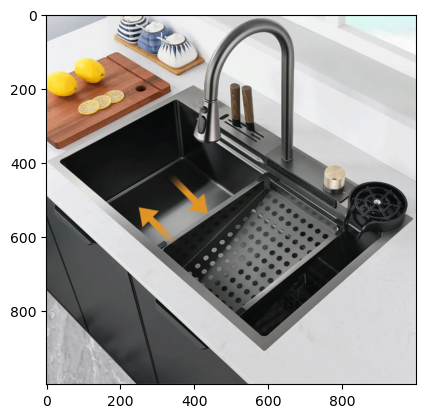

In [5]:
import matplotlib.pyplot as plt

# Load image from URL
print(entries[4000]['url'])
image = Image.open(requests.get(entries[4000]['url'], stream=True).raw)
# Plot image
plt.imshow(image)

In [6]:
image = Image.open(requests.get(entries[4000]['url'], stream=True).raw)
text = ['Ad Creative with text', 'Ad Creative with No text']

output = get_label_probs(image, text, model, processor)

output

tensor([[0.3721, 0.6279]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [22]:
torch.cuda.empty_cache()

## Zocket Generated Image, Grouping the entries by brand

In [9]:
from collections import defaultdict
import json

grouped_entries = defaultdict(lambda: {"name": "", "brand_name": "", "brand_logo": "", "products": []})

for entry in entries:
    brand_name = entry['brand_name']
    grouped_entries[brand_name]['name'] = entry['name']
    grouped_entries[brand_name]['brand_name'] = brand_name
    grouped_entries[brand_name]['brand_logo'] = entry['brand_logo']
    product_info = {"product_name": entry["product_name"], "url": entry["url"]}
    grouped_entries[brand_name]['products'].append(product_info)

# Convert defaultdict to list of dictionaries with products
grouped_entries_list = list(grouped_entries.values())

# Print or use grouped_entries_list as needed

# Save grouped_entries_list to a JSON file
with open('zocket_grouped_entries_2.json', 'w') as json_file:
    json.dump(grouped_entries_list, json_file, indent=2)


In [10]:
len(grouped_entries_list[1]['products'])

total = 0
out_a = []
for i in range(len(grouped_entries_list)):
    out_a.append([grouped_entries_list[i]['brand_name'], len(grouped_entries_list[i]['products'])])
    total += len(grouped_entries_list[i]['products'])
    
print(total, out_a)

110748 [['Baskin Robins', 45], ['app-security', 1814], ['ShopifyStoreAppreview', 113], ['Kim3 USA', 107], ['Axor', 45], ['Quickstart (90c2e259)', 45], ['testzocket', 2], ['FreewheelFiesta', 45], ['TestDhanush', 45], ['Kim1 Canada', 16], ['Shopify test', 126], ['Fashlia', 262], ['Namma Grocery', 272], ['LuxLifeGlitter', 18], ['Hundselen.se', 61], ['ElinaFashion.com', 1676], ['Test', 2], ['ZaiBanZ', 233], ['fuelld.co.nz', 43], ['InArt-Studio', 243], ['hoppiie', 42], ['Mitusy™', 80], ['Right4Paws', 47], ['Snapdeals Store', 43], ['Fiber Salons', 22], ['IndiFinds Shop', 45], ['Cart Smart', 13], ['rosebearss', 22], ['Animaniac', 16], ['FREEDOM WORLD', 3], ['AngelTime', 300], ['KG LLC ', 224], ['Rockadavers', 266], ['StarryLight', 1], ['The Boutiquee', 24], ['BlueSoni', 13], ['Puma', 27], ['sanbox-zocket', 20], ['AuchShop', 29], ['infinity Glow', 28], ['My Store', 28], ['CoolFit', 70], ['Raven Moon Gift Store', 196], ['mnmorganic', 46], ['Elegance Bazaar ', 31], ['Snowdays.co', 1], ['Celtic K

In [11]:
sorted_data = sorted(out_a, key=lambda x: x[1], reverse=True)

print(sorted_data)


[['TradingCardsMarketplace.com', 24171], ['We Ship it Online', 14754], ['De Moza', 14142], ['Pastel', 6055], ['Kulture', 3533], ['Hikoro', 3286], ['EMBRACE', 3199], ['GermanHeart', 3086], ['app-security', 1814], ['Sammaya', 1683], ['ElinaFashion.com', 1676], ['Scental Blush', 1309], ['Crazy K Farm Pet and Poultry', 1260], ['Fashionlavha.com', 1123], ['S&GSTORE', 1004], ['colorat.eu', 1002], ['Homeprivilez', 918], ['SHOPP.us', 879], ['Mothertip', 848], ['ANIMATEK', 788], ['Shop-for-u', 772], ['PETGS', 746], ['The Useless Pancreas', 729], ['Retrorama', 700], ['Waze Clothing ', 656], ['Partners Hair Design', 614], ['MIANIMED', 585], ['Girl Season Boutique', 555], ['goraw', 533], ['Léa Shop', 520], ['THE V', 484], ['Koning Spandoek', 482], ['Luxury Clothing', 476], ['Forever Hood', 443], ['Trendy Swag Market', 432], ['Store Of Globe', 431], ['Aussie Kitchen reno', 412], ['Teenwear.eu', 400], ['The Outlet', 391], ['Viva Vista Store', 387], ['Targo Auto HU', 356], ['Tech Nexa store', 350], [

In [12]:
all_img_urls = []
for i in range(253):
    for z in  range(len(grouped_entries_list[i]['products'])):
        all_img_urls.append({'product_name': grouped_entries_list[i]['products'][z]['product_name'], 'url': grouped_entries_list[i]['products'][z]['url']})

In [13]:
print(len(all_img_urls),"\n", all_img_urls[0])

110748 
 {'product_name': 'Gift Card-$10', 'url': 'https://cdn.shopify.com/s/files/1/0668/7588/3752/products/gift_card.png?v=1696917083'}


In [14]:
import random
rand_100_indx = random.sample(range(0, len(all_img_urls)), 100)
rand_100_img_urls = [all_img_urls[i] for i in rand_100_indx]

rand_100_img_urls

[{'product_name': 'Traditional Ethnicwear Dark Red Georgette Floral Print Saree',
  'url': 'https://cdn.shopify.com/s/files/1/0625/3566/3867/products/3757.jpg?v=1697716265'},
 {'product_name': '2022 Breathable Knitted Mesh Casual Shoes Lightweight Smart Casual Shoes Office Work Footwear Men Sh',
  'url': 'https://cdn.shopify.com/s/files/1/0863/1782/6324/products/BHKH-2022-Breathable-Knitted-Mesh-Casual-Shoes-Lightweight-Smart-Casual-Shoes-Office-Work-Footwear-Men-Shoes_31695795-0347-4d2c-abc0-66936ad3529c.webp?v=1708201436'},
 {'product_name': 'LOS788 - Silver 925 Sterling Silver Earrings with Synthetic Glass Bead in Multi Color',
  'url': 'https://cdn.shopify.com/s/files/1/0806/1265/5436/files/265519_large_7fbd06c0-11ac-49ee-a06c-3e26c400ee44.png?v=1709288838'},
 {'product_name': 'Kids – Girls Printed Ankle Leggings Indian Teal',
  'url': 'https://cdn.shopify.com/s/files/1/1171/0232/products/3_0561b5c3-a1b4-4ee2-a323-e64414df192c.jpg?v=1668408535'},
 {'product_name': 'USB and Solar Ch

In [16]:
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm 
for i in tqdm(range(len(rand_100_img_urls))):
    print(rand_100_img_urls[i]['url'])
    image = Image.open(requests.get(rand_100_img_urls[i]['url'], stream=True).raw)
    text = ['Ad Creative with text', 'Ad Creative with No text']
    output_label_probs = get_label_probs(image, text)
    
    # Create plot with 100 images, product name and label probabilities
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(f"Product Name: {rand_100_img_urls[i]['product_name']}\nLabel Probabilities: {output_label_probs}")
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

https://cdn.shopify.com/s/files/1/0625/3566/3867/products/3757.jpg?v=1697716265


  0%|          | 0/100 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 3.81 GiB of which 10.69 MiB is free. Including non-PyTorch memory, this process has 3.80 GiB memory in use. Of the allocated memory 3.71 GiB is allocated by PyTorch, and 6.20 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)